In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv('Loan_Data.csv')
#data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
ds = data.drop('Loan_ID', axis = 1)
ds.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [80]:
ds.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
cat = data.select_dtypes(exclude = "number")
num = data.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Date')
display(cat.head())

Numerical Data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0




Categorical Date


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [82]:
ds['Dependents'].sample(200).values
ds['Dependents'] = ds['Dependents'].str.replace('+', '')
ds['Dependents'] = pd.to_numeric(ds['Dependents'], errors = 'coerce')
ds['Dependents'].dtypes

dtype('float64')

In [83]:
new_cat = ds.select_dtypes(exclude = "number")
new_num = ds.select_dtypes(include = 'number')

print('Numerical Data')
display(new_num.head())
print(f'\n\nCategorical Date')
display(new_cat.head())

Numerical Data


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0




Categorical Date


,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y


In [84]:
for i in ds.columns:
    if ((ds[i].isnull().sum() / len(ds)) * 100) < 30:
        if ds[i].dtypes != 'O':
            ds[i].fillna(ds[i].median(), inplace = True)
        else:
            ds[i].fillna(ds[i].mode()[0], inplace = True)
    else:
        ds.drop(i, axis = 1, inplace = True)

ds.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [85]:
columns_to_scale = []
for i in new_num.columns:
    if ds[i].describe()[2] > 1500:
        columns_to_scale.append(i)

columns_to_scale

['ApplicantIncome', 'CoapplicantIncome']

In [86]:
# SCALE THE NUMERICAL COLUMNS
from sklearn.preprocessing import StandardScaler
import joblib

scaled = {}

for i in columns_to_scale:
    scale = StandardScaler()
    ds[i] = scale.fit_transform(ds[[i]])
    joblib.dump(scale, open(f'{i}_scaler.pkl', 'wb'))
    scaled[i + '_scaler'] = scale

scaled

{'ApplicantIncome_scaler': StandardScaler(),
 'CoapplicantIncome_scaler': StandardScaler()}

In [87]:
# LABEL ENCODE THE CATEGORICAL COLUMNS
from sklearn.preprocessing import LabelEncoder

encoded = {}  # ................................................................ Have a dictionary to save the encoders
for i in new_cat.columns: # ........................................................ Iterate through the new_categorical variables
    encode = LabelEncoder() # .................................................. Instantiate the encoder transformer
    ds[i] = encode.fit_transform(ds[i]) # ...................................... Encode the columns in ech iteration
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb')) # ...................... Save the transformer to file for future reusal
    encoded[i +'_encoder'] = encode # .......................................... Save the transformer to the above stated dictionary for easy access

encoded

{'Gender_encoder': LabelEncoder(),
 'Married_encoder': LabelEncoder(),
 'Education_encoder': LabelEncoder(),
 'Self_Employed_encoder': LabelEncoder(),
 'Property_Area_encoder': LabelEncoder(),
 'Loan_Status_encoder': LabelEncoder()}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

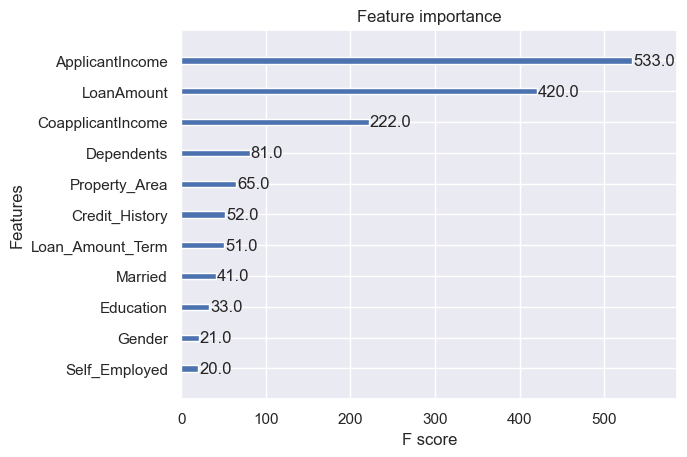

In [88]:
# conduct Feature Selection
# - Using XGBOOST to find feature importance

import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBClassifier()

x = ds.drop('Loan_Status', axis = 1)
y = ds.Loan_Status

model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [89]:
sel_cols = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents', 'Property_Area',
            'Credit_History', 'Loan_Amount_Term', 'Loan_Status']

new_data = ds[sel_cols]
new_data.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
0,0.072991,128.0,-0.554487,0.0,2,1.0,360.0,1
1,-0.134412,128.0,-0.038732,1.0,0,1.0,360.0,0
2,-0.393747,66.0,-0.554487,0.0,2,1.0,360.0,1
3,-0.462062,120.0,0.251980,0.0,2,1.0,360.0,1
4,0.097728,141.0,-0.554487,0.0,2,1.0,360.0,1


In [90]:
# Modelling
from sklearn.model_selection import train_test_split

x = new_data.drop('Loan_Status', axis = 1)
y = new_data.Loan_Status

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.10)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (552, 7)
Xtest: (62, 7)
Ytrain: (552,)
Ytest: (62,)


,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
474,0.021058,162.0,1.035190,2.0,0,1.0,360.0,1
160,-0.580017,98.0,-0.198452,0.0,1,1.0,360.0,1
596,0.160474,187.0,-0.212474,2.0,0,1.0,360.0,0
231,-0.276448,42.0,-0.554487,0.0,0,1.0,180.0,1
479,-0.402430,128.0,-0.006240,2.0,2,1.0,360.0,0
...,...,...,...,...,...,...,...,...
308,2.429453,480.0,-0.554487,0.0,0,1.0,360.0,0
169,0.425379,200.0,-0.554487,2.0,1,1.0,360.0,1
320,-0.492042,115.0,0.186655,0.0,1,1.0,360.0,1
84,-0.231888,50.0,-0.554487,1.0,2,1.0,240.0,1


<Axes: xlabel='Loan_Status', ylabel='count'>

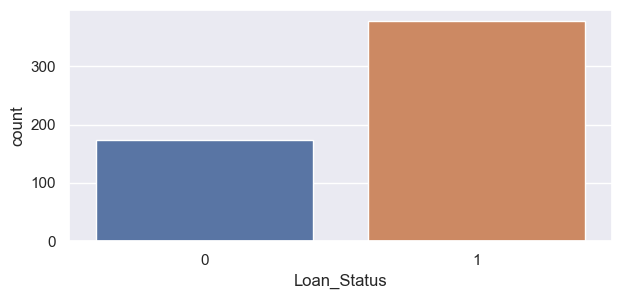

In [91]:
training_data = pd.concat([xtrain, ytrain], axis = 1)
plt.figure(figsize = (7,3))

display(training_data)
sns.countplot(x = training_data['Loan_Status'])

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
596,0.160474,187.0,-0.212474,2.0,0,1.0,360.0,0
479,-0.402430,128.0,-0.006240,2.0,2,1.0,360.0,0
605,-0.492042,128.0,0.745163,0.0,2,1.0,180.0,0
17,-0.310196,76.0,-0.554487,0.0,2,0.0,360.0,0
107,0.316108,120.0,-0.554487,0.0,0,1.0,360.0,0
...,...,...,...,...,...,...,...,...
370,1.696499,55.0,-0.554487,0.0,1,1.0,360.0,1
90,-0.400628,131.0,0.437351,0.0,1,1.0,360.0,1
247,0.197334,137.0,-0.554487,1.0,2,1.0,180.0,1
217,-0.274646,131.0,0.052586,0.0,1,1.0,360.0,1


<Axes: xlabel='Loan_Status', ylabel='count'>

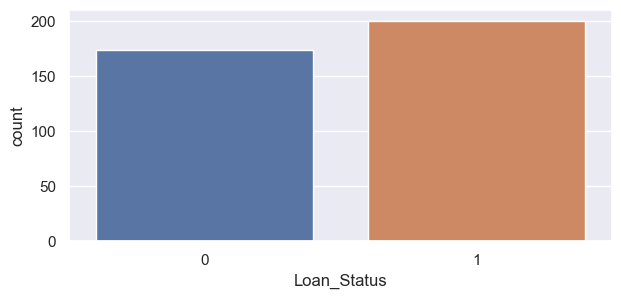

In [92]:
class0 = training_data.loc[training_data['Loan_Status'] == 0]
class1 = training_data.loc[training_data['Loan_Status'] == 1]

new_class1 = class1.sample(200)

new_training_data = pd.concat([class0, new_class1], axis = 0)

display(new_training_data)
plt.figure(figsize = (7,3))
sns.set(style= 'darkgrid')
sns.countplot(x = new_training_data['Loan_Status'])

In [93]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
xgb_model = xgb.XGBClassifier()

x = new_training_data.drop('Loan_Status', axis = 1)
y = new_training_data['Loan_Status']

xgb_model.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [94]:
from sklearn.metrics import classification_report

cv = xgb_model.predict(xtest)
print(classification_report(cv, ytest))

              precision    recall  f1-score   support

           0       0.72      0.52      0.60        25
           1       0.73      0.86      0.79        37

    accuracy                           0.73        62
   macro avg       0.72      0.69      0.70        62
weighted avg       0.73      0.73      0.72        62



In [95]:
#Model Saving
joblib.dump(xgb_model, open('Loan_StatusModel.pkl', 'wb'))

In [98]:
ds.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,0.072991,-0.554487,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,-0.134412,-0.038732,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,-0.393747,-0.554487,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,-0.462062,0.251980,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,0.097728,-0.554487,141.0,360.0,1.0,2,1
